<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part2/P2_Ch02_CH04_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (1 Feature)

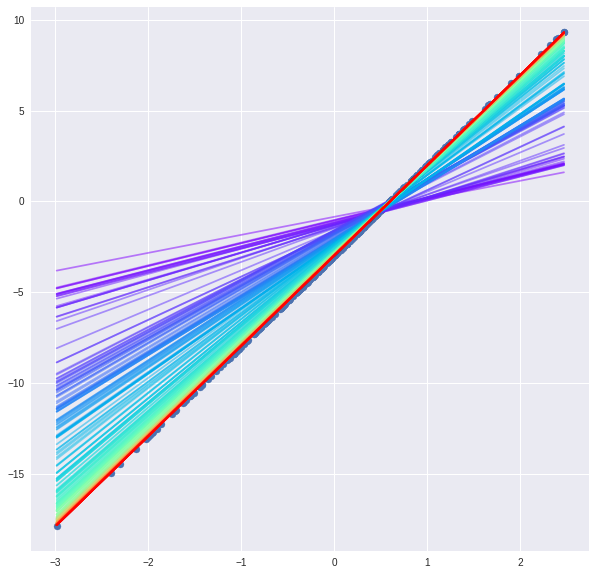

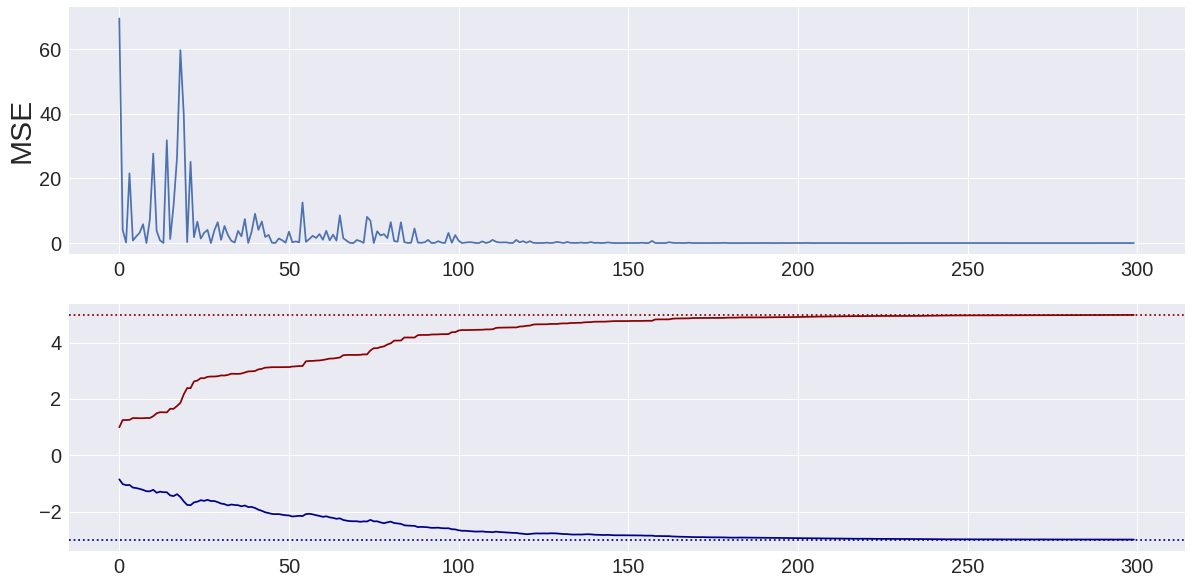

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(10)
plt.style.use('seaborn')

# set params
N = 300
lr = 0.01
t_w, t_b = 5, -3
w, b = np.random.normal(-3,3,2)

#generate dataset
x_data = np.random.randn(N,)
y_data = x_data*t_w + t_b
#fig, ax = plt.subplots(figsize = (10,10))
#ax.scatter(x_data, y_data)

#visualize dataset
cmap = cm.get_cmap('rainbow', lut = N)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x_data, y_data)

x_range = np.array([x_data.min(), x_data.max()])
J_track = list()
w_track, b_track = list(), list()

#train model and visualize updated models
for data_idx , (x, y) in enumerate(zip(x_data, y_data)):
  w_track.append(w)
  b_track.append(b)
  
  #visualize updated model
  y_range = w*x_range +b
  ax.plot(x_range, y_range, color=cmap(data_idx), alpha =0.5)

  #forward propagation
  pred = x*w +b
  J = (y-pred)**2
  J_track.append(J)

  #jacobians
  dJ_dpred = -2*(y-pred)
  dpred_dw = x
  dpred_db = 1

  #backpropagation 
  dJ_dw = dJ_dpred * dpred_dw
  dJ_db = dJ_dpred * dpred_db

  #parameter updata
  w = w - lr*dJ_dw
  b = b - lr*dJ_db

#visualize results

fig, axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[1].plot(w_track, color = 'darkred')
axes[1].plot(b_track, color = 'darkblue')

axes[0].set_ylabel('MSE', fontsize = 30)
axes[0].tick_params(labelsize = 20)

axes[1].axhline(y = t_w, color =  'darkred', linestyle = ':')
axes[1].axhline(y = t_b, color =  'darkblue', linestyle = ':')
axes[1].tick_params(labelsize = 20)